In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
df = pd.read_csv('./Data/adult.txt', header=None, names = ['age', 'workclass','fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race'\
, 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50k'])

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  50k             32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [72]:
df['50k'].value_counts()

 <=50K    24720
 >50K      7841
Name: 50k, dtype: int64

In [73]:
# deep learning model을 생성하고 학습 후 평가하시오
# machine learning 모델과 비교

In [74]:
df = pd.get_dummies(df)
df

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,50k_ <=50K,50k_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 110 entries, age to 50k_ >50K
dtypes: int64(6), uint8(104)
memory usage: 4.7 MB


In [76]:
y = df.values[:, 108:]
x = df.values[:, :108]

In [77]:
x.shape

(32561, 108)

In [78]:
y.shape

(32561, 2)

In [79]:
model = Sequential()
model.add(Dense(100, input_dim = 108, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               10900     
                                                                 
 dense_13 (Dense)            (None, 80)                8080      
                                                                 
 dense_14 (Dense)            (None, 60)                4860      
                                                                 
 dense_15 (Dense)            (None, 2)                 122       
                                                                 
Total params: 23,962
Trainable params: 23,962
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [81]:
model.fit(x, y, epochs = 100, batch_size = 1000)

Epoch 1/100
33/33 [==============================] - 0s 2ms/step - loss: 924.4697 - accuracy: 0.6414
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 416.8492 - accuracy: 0.6538
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 207.7433 - accuracy: 0.7019
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 165.2250 - accuracy: 0.6732
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 430.4677 - accuracy: 0.6681
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 355.4095 - accuracy: 0.6653
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 337.5161 - accuracy: 0.6760
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: 252.5120 - accuracy: 0.6685
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: 212.3428 - accuracy: 0.7055
Epoch 10/100
33/33 [==============================] - 0s 2ms/step - loss: 113.6433 - accura

33/33 [==============================] - 0s 2ms/step - loss: 17.5243 - accuracy: 0.6879
Epoch 82/100
33/33 [==============================] - 0s 2ms/step - loss: 17.1260 - accuracy: 0.6874
Epoch 83/100
33/33 [==============================] - 0s 2ms/step - loss: 19.5293 - accuracy: 0.6639
Epoch 84/100
33/33 [==============================] - 0s 2ms/step - loss: 45.4109 - accuracy: 0.6795
Epoch 85/100
33/33 [==============================] - 0s 2ms/step - loss: 18.9133 - accuracy: 0.6839
Epoch 86/100
33/33 [==============================] - 0s 2ms/step - loss: 13.6504 - accuracy: 0.6937
Epoch 87/100
33/33 [==============================] - 0s 2ms/step - loss: 13.9259 - accuracy: 0.6985
Epoch 88/100
33/33 [==============================] - 0s 2ms/step - loss: 14.5458 - accuracy: 0.6780
Epoch 89/100
33/33 [==============================] - 0s 2ms/step - loss: 12.9713 - accuracy: 0.6990
Epoch 90/100
33/33 [==============================] - 0s 2ms/step - loss: 15.2710 - accuracy: 0.6587
Epo

In [82]:
model.evaluate(x, y)

1018/1018 [==============================] - 1s 575us/step - loss: 6.0671 - accuracy: 0.7969


[6.067140579223633, 0.796934962272644]

In [83]:
# train_test_split

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111)

In [85]:
model = Sequential()
model.add(Dense(100, input_dim = 108, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               10900     
                                                                 
 dense_17 (Dense)            (None, 80)                8080      
                                                                 
 dense_18 (Dense)            (None, 60)                4860      
                                                                 
 dense_19 (Dense)            (None, 2)                 122       
                                                                 
Total params: 23,962
Trainable params: 23,962
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [87]:
model.fit(x_train, y_train, epochs = 100, batch_size = 1000)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 1810.8108 - accuracy: 0.6372
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 592.0505 - accuracy: 0.6722
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 259.3416 - accuracy: 0.6534
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 331.9678 - accuracy: 0.6938
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 302.3626 - accuracy: 0.6443
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 613.9930 - accuracy: 0.7015
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 173.8485 - accuracy: 0.6747
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 247.0281 - accuracy: 0.6982
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 271.5482 - accuracy: 0.6757
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 132.4422 - accur

25/25 [==============================] - 0s 2ms/step - loss: 25.7831 - accuracy: 0.6928
Epoch 82/100
25/25 [==============================] - 0s 2ms/step - loss: 24.8902 - accuracy: 0.6768
Epoch 83/100
25/25 [==============================] - 0s 2ms/step - loss: 26.2076 - accuracy: 0.6905
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 50.1579 - accuracy: 0.6697
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 27.0291 - accuracy: 0.6928
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 24.3725 - accuracy: 0.7084
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 68.6889 - accuracy: 0.6468
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 64.5469 - accuracy: 0.6946
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 24.1356 - accuracy: 0.6766
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 27.0159 - accuracy: 0.7041
Epo

In [88]:
model.evaluate(x_test, y_test)

255/255 [==============================] - 0s 598us/step - loss: 31.4824 - accuracy: 0.7902


[31.482425689697266, 0.7901977896690369]

In [89]:
# 스케일링

In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [91]:
model = Sequential()
model.add(Dense(100, input_dim = 108, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 100)               10900     
                                                                 
 dense_21 (Dense)            (None, 80)                8080      
                                                                 
 dense_22 (Dense)            (None, 60)                4860      
                                                                 
 dense_23 (Dense)            (None, 2)                 122       
                                                                 
Total params: 23,962
Trainable params: 23,962
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [93]:
model.fit(x_train_sc, y_train, epochs = 100, batch_size = 1000)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7980
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8386
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8479
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8538
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8581
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8607
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8619
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8658
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8642
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8677
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9258
Epoch 84/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9267
Epoch 85/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9287
Epoch 86/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9274
Epoch 87/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1563 - accuracy: 0.9293
Epoch 88/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.9299
Epoch 89/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9291
Epoch 90/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9304
Epoch 91/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.9300
Epoch 92/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9297
Epoch 93/100


In [94]:
model.evaluate(x_test_sc, y_test)

255/255 [==============================] - 0s 608us/step - loss: 0.7090 - accuracy: 0.8160


[0.709015965461731, 0.8159931302070618]

In [97]:
# 쌤버전

In [103]:
df = pd.read_csv('./Data/adult.txt', header=None, names = ['age', 'workclass','fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race'\
, 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50k'])

df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [112]:
y = df['50k'].apply(lambda x : 1 if x == ' >50K' else 0)
x = df.loc[:, :'native-country']

In [113]:
x.shape

(32561, 14)

In [114]:
x = pd.get_dummies(x)

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=111)

In [116]:
sclaer = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [117]:
model = Sequential()
model.add(Dense(1024, input_dim = 108, activation = 'relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(56, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              111616    
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 56)                7224      
                                                                 
 dense_29 (Dense)            (None, 1)                 57        
                                                                 
Total params: 807,921
Trainable params: 807,921
Non-tr

In [118]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [119]:
hist = model.fit(x_train_sc, y_train, validation_split=0.2, epochs = 100, batch_size = 20)

Epoch 1/100
912/912 [==============================] - 4s 4ms/step - loss: 0.3549 - accuracy: 0.8354 - val_loss: 0.3157 - val_accuracy: 0.8563
Epoch 2/100
912/912 [==============================] - 3s 3ms/step - loss: 0.3211 - accuracy: 0.8499 - val_loss: 0.3052 - val_accuracy: 0.8620
Epoch 3/100
912/912 [==============================] - 3s 4ms/step - loss: 0.3113 - accuracy: 0.8528 - val_loss: 0.3051 - val_accuracy: 0.8579
Epoch 4/100
912/912 [==============================] - 3s 4ms/step - loss: 0.3043 - accuracy: 0.8586 - val_loss: 0.3085 - val_accuracy: 0.8574
Epoch 5/100
912/912 [==============================] - 3s 3ms/step - loss: 0.2977 - accuracy: 0.8618 - val_loss: 0.3036 - val_accuracy: 0.8587
Epoch 6/100
912/912 [==============================] - 3s 3ms/step - loss: 0.2922 - accuracy: 0.8635 - val_loss: 0.3044 - val_accuracy: 0.8574
Epoch 7/100
912/912 [==============================] - 3s 3ms/step - loss: 0.2863 - accuracy: 0.8666 - val_loss: 0.3101 - val_accuracy: 0.8546

Epoch 58/100
912/912 [==============================] - 3s 4ms/step - loss: 0.1124 - accuracy: 0.9500 - val_loss: 1.0314 - val_accuracy: 0.8223
Epoch 59/100
912/912 [==============================] - 3s 4ms/step - loss: 0.1142 - accuracy: 0.9499 - val_loss: 1.4884 - val_accuracy: 0.8276
Epoch 60/100
912/912 [==============================] - 3s 4ms/step - loss: 0.1091 - accuracy: 0.9520 - val_loss: 1.0612 - val_accuracy: 0.8324
Epoch 61/100
912/912 [==============================] - 3s 3ms/step - loss: 0.1035 - accuracy: 0.9528 - val_loss: 1.2430 - val_accuracy: 0.8346
Epoch 62/100
912/912 [==============================] - 3s 4ms/step - loss: 0.1031 - accuracy: 0.9523 - val_loss: 1.5850 - val_accuracy: 0.8329
Epoch 63/100
912/912 [==============================] - 3s 4ms/step - loss: 0.1079 - accuracy: 0.9535 - val_loss: 1.0722 - val_accuracy: 0.8298
Epoch 64/100
912/912 [==============================] - 3s 3ms/step - loss: 0.0984 - accuracy: 0.9544 - val_loss: 1.4852 - val_accuracy:

In [127]:
import tensorflow as tf

y_oh = tf.keras.utils.to_categorical(y)
y_oh

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y_oh, test_size=0.3, random_state=111)

In [129]:
sclaer = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [171]:
model = Sequential()
model.add(Dense(128, input_dim = 108, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(26, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 128)               13952     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_84 (Dense)            (None, 56)                7224      
                                                                 
 dropout_10 (Dropout)        (None, 56)                0         
                                                                 
 dense_85 (Dense)            (None, 26)                1482      
                                                                 
 dropout_11 (Dropout)        (None, 26)                0         
                                                                 
 dense_86 (Dense)            (None, 2)               

In [172]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adagrad')

In [173]:
hist = model.fit(x_train_sc, y_train, validation_split=0.2, epochs = 100, batch_size = 20)

Epoch 1/100
912/912 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.7022 - val_loss: 0.4873 - val_accuracy: 0.7714
Epoch 2/100
912/912 [==============================] - 1s 964us/step - loss: 0.5260 - accuracy: 0.7565 - val_loss: 0.4485 - val_accuracy: 0.7855
Epoch 3/100
912/912 [==============================] - 1s 954us/step - loss: 0.4947 - accuracy: 0.7689 - val_loss: 0.4238 - val_accuracy: 0.8017
Epoch 4/100
912/912 [==============================] - 1s 958us/step - loss: 0.4743 - accuracy: 0.7780 - val_loss: 0.4063 - val_accuracy: 0.8129
Epoch 5/100
912/912 [==============================] - 1s 959us/step - loss: 0.4609 - accuracy: 0.7825 - val_loss: 0.3931 - val_accuracy: 0.8243
Epoch 6/100
912/912 [==============================] - 1s 974us/step - loss: 0.4492 - accuracy: 0.7887 - val_loss: 0.3830 - val_accuracy: 0.8283
Epoch 7/100
912/912 [==============================] - 1s 992us/step - loss: 0.4382 - accuracy: 0.7932 - val_loss: 0.3749 - val_accu

912/912 [==============================] - 1s 962us/step - loss: 0.3679 - accuracy: 0.8271 - val_loss: 0.3287 - val_accuracy: 0.8493
Epoch 58/100
912/912 [==============================] - 1s 961us/step - loss: 0.3721 - accuracy: 0.8255 - val_loss: 0.3286 - val_accuracy: 0.8495
Epoch 59/100
912/912 [==============================] - 1s 1ms/step - loss: 0.3725 - accuracy: 0.8273 - val_loss: 0.3285 - val_accuracy: 0.8493
Epoch 60/100
912/912 [==============================] - 1s 946us/step - loss: 0.3663 - accuracy: 0.8289 - val_loss: 0.3282 - val_accuracy: 0.8497
Epoch 61/100
912/912 [==============================] - 1s 927us/step - loss: 0.3679 - accuracy: 0.8286 - val_loss: 0.3281 - val_accuracy: 0.8497
Epoch 62/100
912/912 [==============================] - 1s 922us/step - loss: 0.3683 - accuracy: 0.8312 - val_loss: 0.3279 - val_accuracy: 0.8500
Epoch 63/100
912/912 [==============================] - 1s 1ms/step - loss: 0.3666 - accuracy: 0.8281 - val_loss: 0.3278 - val_accuracy: 0.

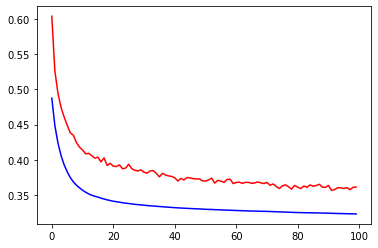

In [174]:
plt.plot(hist.history['loss'], c = 'r')
plt.plot(hist.history['val_loss'], c = 'b')

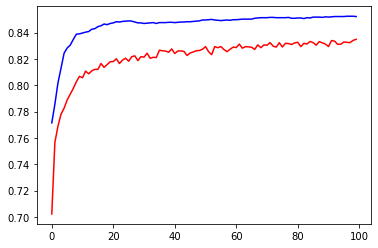

In [175]:
plt.plot(hist.history['accuracy'], c = 'r')
plt.plot(hist.history['val_accuracy'], c = 'b')

In [176]:
model.evaluate(x_test, y_test)

306/306 [==============================] - 0s 944us/step - loss: 1552.5114 - accuracy: 0.7691


[1552.5113525390625, 0.7690654397010803]

In [177]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8506500153546934